<a href="https://colab.research.google.com/github/Sidharth-NK/ML_PROJECTS/blob/main/Linear_Regression_with_multiple_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')


In [2]:
# Create data set
X,y = make_regression(n_samples=500,n_features=10,n_informative = 5,noise=25.8,random_state = 0)
pd.DataFrame(X).head()
n_features = X.shape[1]

In [3]:
# normalize the data
def normalize(X):
  u = X.mean(axis = 0)
  std = X.std(axis = 0)
  return (X - u)/std


In [4]:
X =  normalize(X)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,1.764831,1.579606,0.093808,0.341546,0.103202,0.745205,0.421736,-0.461091,-0.710885,-0.761760
1,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
2,0.125936,-0.058708,1.030243,0.559735,-2.658385,1.007996,-2.100631,-0.566372,0.213499,0.175267
3,-1.537551,-0.717175,0.635024,-0.351591,-2.295090,-0.855000,1.655498,-0.263762,0.068151,0.629417
4,-0.072209,-2.155744,0.533470,1.597083,1.331926,-0.658985,1.094355,0.815541,0.204426,0.872842
...,...,...,...,...,...,...,...,...,...,...
495,-1.253392,-0.268853,-0.691542,0.233492,1.161953,-3.044382,1.061829,-0.585893,-0.527301,0.657643
496,-0.281710,-0.450359,0.116596,0.519078,0.513259,-0.508304,0.150212,0.839923,1.248993,-0.299447
497,-1.790187,-0.293165,-0.408284,-0.028416,-0.280489,-0.083013,-0.916592,-1.608336,-0.134063,0.245324
498,-0.335529,-1.053357,0.723049,0.006409,-0.627253,-0.400093,0.464895,-0.945936,0.551777,1.688484


In [5]:
print(X.mean(),X.std())

-1.1368683772161604e-17 0.9999999999999999


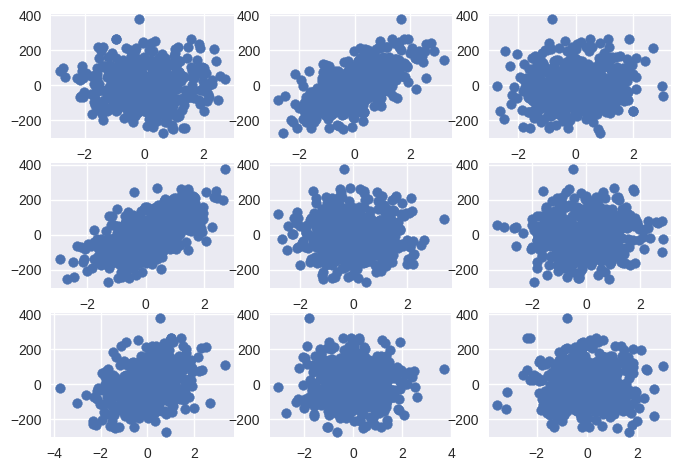

In [6]:
# visualize y as a function of each feature

for feature in range(0,9):
  plt.subplot(3,3,feature+1)
  plt.scatter(X[:,feature],y)
plt.show()


In [7]:
# step 4 train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,shuffle = False,random_state = 0)


In [8]:
X_train.shape


(350, 10)

In [9]:
def preprocess(X):
  # add a column of ones in X as the 0th column
  if X.shape[1] == n_features:
    m = X.shape[0]
    ones = np.ones((m,1))
    X = np.hstack((ones,X))
  return X

In [10]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,1.764831,1.579606,0.093808,0.341546,0.103202,0.745205,0.421736,-0.461091,-0.710885,-0.761760
1,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
2,0.125936,-0.058708,1.030243,0.559735,-2.658385,1.007996,-2.100631,-0.566372,0.213499,0.175267
3,-1.537551,-0.717175,0.635024,-0.351591,-2.295090,-0.855000,1.655498,-0.263762,0.068151,0.629417
4,-0.072209,-2.155744,0.533470,1.597083,1.331926,-0.658985,1.094355,0.815541,0.204426,0.872842


In [11]:
X_train = preprocess(X_train)
X_test = preprocess(X_test)
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,1.764831,1.579606,0.093808,0.341546,0.103202,0.745205,0.421736,-0.461091,-0.710885,-0.761760
1,1.0,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
2,1.0,0.125936,-0.058708,1.030243,0.559735,-2.658385,1.007996,-2.100631,-0.566372,0.213499,0.175267
3,1.0,-1.537551,-0.717175,0.635024,-0.351591,-2.295090,-0.855000,1.655498,-0.263762,0.068151,0.629417
4,1.0,-0.072209,-2.155744,0.533470,1.597083,1.331926,-0.658985,1.094355,0.815541,0.204426,0.872842


In [12]:
# this is the hypothesis function, this is using dot prodcut instead of looping to increase efficiency
def hypothesis(X,theta):
  return np.dot(X,theta)

def loss(X,y,theta): #mse
  yp = hypothesis(X,theta)
  error = np.mean((y-yp)**2)
  return error

def gradient(X,y,theta):
  yp = hypothesis(X,theta)
  grad = np.dot(X.T,(yp-y))
  m = X.shape[0]
  return grad/m

def train(X,y,learning_rate = 0.1,max_iters = 100):
  n = X.shape[1]
  theta = np.random.randn(n)
  error_list = []
  for i in range(max_iters):
    e = loss(X,y,theta)
    error_list.append(e)
    grad = gradient(X,y,theta)
    theta = theta - learning_rate*grad

  plt.plot(error_list)
  return theta



[-5.15784461 -0.2663786  61.81928244 11.37796933 65.5268389  -0.48082508
  0.93783254 41.17525475  0.54468889  0.75646266 22.42737468]


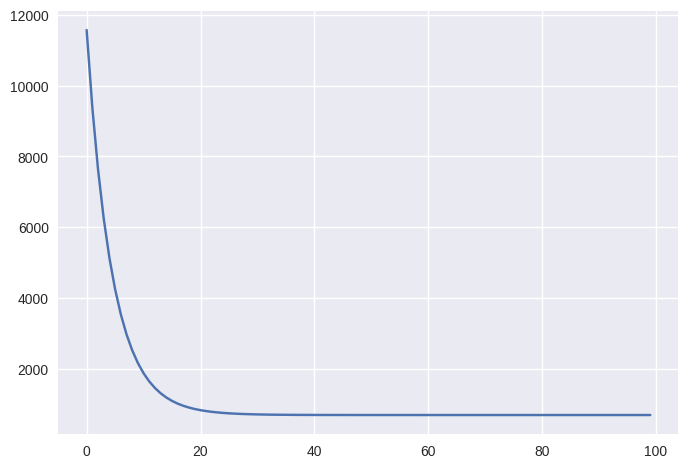

In [13]:
theta = train(X_train,y_train)
print(theta)

In [14]:
print(theta.shape)

(11,)


In [15]:
# To check how well our model perfroms. this score will tell
def r2score(y,yp):
  ymean = y.mean()
  num = np.sum((y-yp)**2)
  denom = np.sum((y - ymean)**2)
  return (1 - num/denom)*100


In [16]:
# R2 score can be further improved by reducing the noise in the data
yp = hypothesis(X_test,theta)
r2score(y_test,yp)

93.21412993188906

**This involves using prebuilt functions using sklearn library to do linear regression**

In [17]:
# Linear regression using sklearn

from sklearn.linear_model import LinearRegression


In [18]:
#creating a model
model = LinearRegression()

In [19]:
# training the data
model.fit(X_train,y_train) # this is similar to training the data

LinearRegression()

In [20]:
yp = model.predict(X_test)
yp.shape

(150,)

In [21]:
# To evaluate how good or bad the model is, we use the following method. This default checks the R2 score
model.score(X_test,y_test)

0.9321372696807685

In [22]:
# to find the theta_not
model.intercept_

-5.158503973851915

In [23]:
model.coef_

array([ 0.        , -0.26596171, 61.82000908, 11.38081141, 65.53046157,
       -0.48290608,  0.93519408, 41.17878075,  0.54622406,  0.75372546,
       22.42407857])